# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [51]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('panda.jpg') # можно сделать .resize(())

# x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
# U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

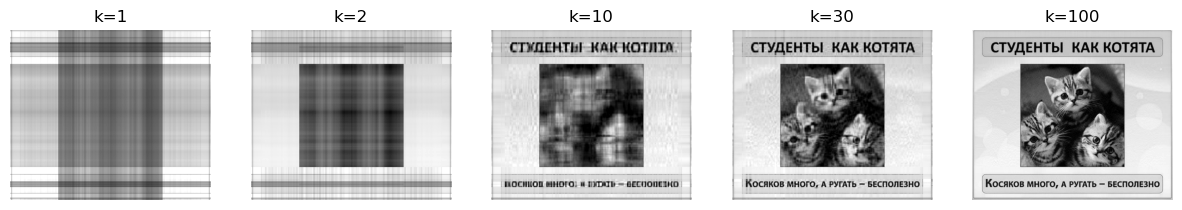

Размер оригинального изображения:  67695 байт
Размер сжатого изображения с k=1: 36744 байт
Размер сжатого изображения с k=2: 38046 байт
Размер сжатого изображения с k=10: 50319 байт
Размер сжатого изображения с k=30: 56783 байт
Размер сжатого изображения с k=100: 59660 байт


In [19]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os


def compress_image(image_path, k_values):
    img = Image.open(image_path) #прочитали картиночку
    img_array = np.array(img)    #преобразовали в numpy массив

    if img_array.ndim == 3:
        img_array = np.mean(img_array, axis=2)  #переделали картиночку в чб

   
    U, S, Vt = np.linalg.svd(img_array, full_matrices=False)  #применяем SVD к матрице (сингулярное разложение)

    compressed_images = []  #собираем в кучку все сжатые картиночки для каждого значения k
    for k in k_values:
        #оставляем только первые k сингулярных значений в массивах, полученных применением SDV к матрице картиночки
        U_k = U[:, :k]
        S_k = np.diag(S[:k])
        Vt_k = Vt[:k, :]
        
        compressed_img = np.dot(U_k, np.dot(S_k, Vt_k)) #восстанавливаем картиночку из массива
        compressed_images.append(compressed_img) #собираем в кучку (кучку см. выше)

    return compressed_images

def save_and_show_images(compressed_images):
    plt.figure(figsize=(15, 5))
    
    for i, img in enumerate(compressed_images):
        img = np.clip(img, 0, 255).astype(np.uint8)  
        Image.fromarray(img).save(f'compressed_image_{i + 1}.jpg') #сохраняем картиночку в формате jpg с названием compressed_image 
        
        plt.subplot(1, len(compressed_images), i + 1) #выводим картиночки в один ряд
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f'k={k_values[i]}')

    plt.show()

image_path = 'мяу.jpg'  #картиночка
k_values = [1, 2, 10, 30, 100]  #небольшое количество сингулярных значений

original_size = os.path.getsize(image_path)
compressed_images = compress_image(image_path, k_values)
save_and_show_images(compressed_images)

print("Размер оригинального изображения: ", original_size ,"байт")
for i in range(len(k_values)):
    compressed_size = os.path.getsize(f'compressed_image_{i + 1}.jpg')
    print(f"Размер сжатого изображения с k={k_values[i]}: {compressed_size} байт")



# Многомерное гауссово распределение
Генерация матрицы ковариации с разными соотношением собственных значений, их поворот и генерация подвыборок

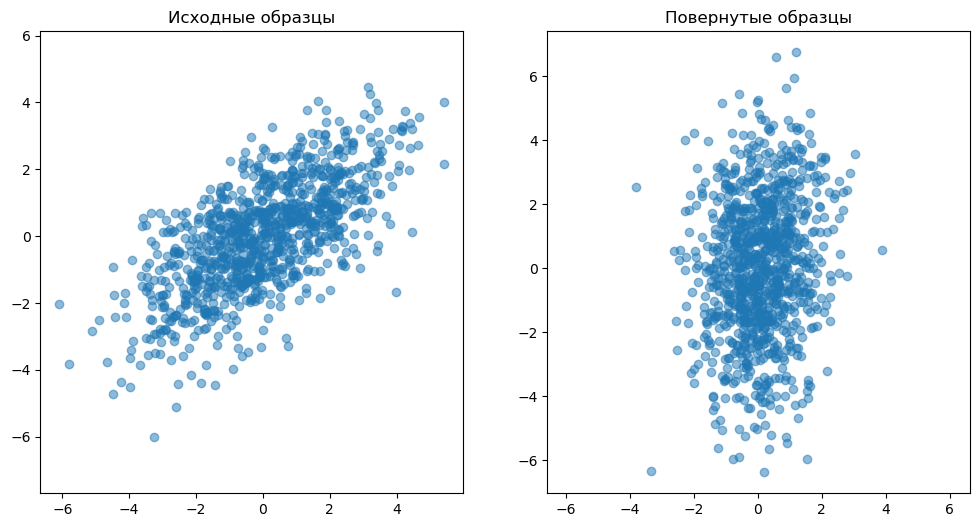

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_covariance_matrix(eigenvalues):  #Шаг 1. Генерация матрицы ковариации на основе собственных значений
    Q = np.random.rand(len(eigenvalues), len(eigenvalues))
    Q, _ = np.linalg.qr(Q)  #получаем ортогональную матрицу 
    D = np.diag(eigenvalues) # Создаем диагональную матрицу собственных значений
    covariance_matrix = Q @ D @ Q.T  # Генерируем матрицу ковариации (вот тут было сложно) @ - матричное умножение
    
    return covariance_matrix

def generate_samples(cov_matrix, num_samples=1000): #Шаг 2. Генерация случайных образцов с заданной матрицей ковариации
    mean = np.zeros(cov_matrix.shape[0])
    samples = np.random.multivariate_normal(mean, cov_matrix, size=num_samples)
    
    return samples

def rotate_covariance(cov_matrix, angle): #Шаг 3. Поворот матрицы ковариации на заданный угол
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                 [np.sin(angle), np.cos(angle)]])
    rotated_cov_matrix = rotation_matrix @ cov_matrix @ rotation_matrix.T
    
    return rotated_cov_matrix

#вызываем функции выше
eigenvalues = np.array([5, 1])  # Разные соотношения собственных значений
cov_matrix = generate_covariance_matrix(eigenvalues)
samples = generate_samples(cov_matrix)
   
angle = np.radians(45)
rotated_cov_matrix = rotate_covariance(cov_matrix, angle) # Поворачиваем матрицу ковариации
rotated_samples = generate_samples(rotated_cov_matrix) #новые образцы из повернутой матрицы ковариации

#Графики
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Исходные образцы")
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.title("Повернутые образцы")
plt.scatter(rotated_samples[:, 0], rotated_samples[:, 1], alpha=0.5)
plt.axis('equal')

plt.show()


# Бинарная классификация
Создание двух подвыборок с одинаковыми и различными матрицами ковариации, построение разделяющей поверхности в обоих случаях

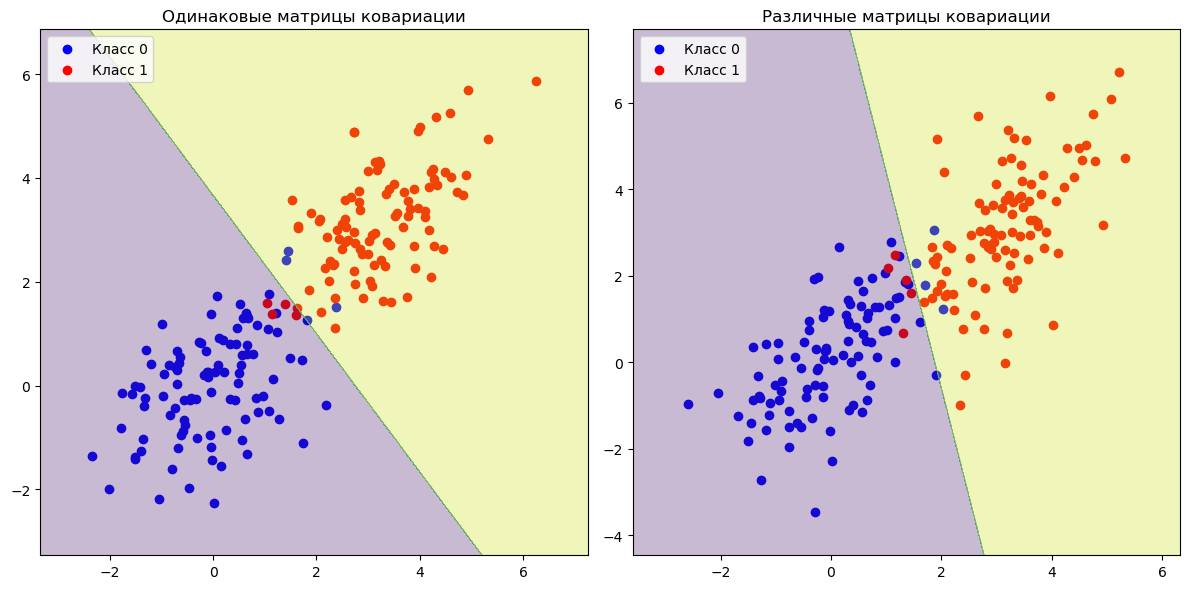

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def generate_samples(cov_matrix, mean, num_samples=100): #Шаг 1. Генерация случайных образцов с заданной матрицей ковариации
    return np.random.multivariate_normal(mean, cov_matrix, num_samples)

def plot_decision_boundary(model, X, y): #Шаг 2. Построение разделяющей поверхности
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    
mean1 = [0, 0]
mean2 = [3, 3]
    
cov_matrix_same = [[1, 0.5], [0.5, 1]]  #одинаковые матрицы ковариации
cov_matrix_diff = [[1, 0.8], [0.8, 2]]   #разные матрицы ковариации
    
#генерируем подвыборки (с одинаковыми и с разными)
samples1_same = generate_samples(cov_matrix_same, mean1, num_samples=100)
samples2_same = generate_samples(cov_matrix_same, mean2, num_samples=100)

samples1_diff = generate_samples(cov_matrix_diff, mean1, num_samples=100)
samples2_diff = generate_samples(cov_matrix_diff, mean2, num_samples=100)

X_same = np.vstack((samples1_same, samples2_same))
y_same = np.array([0] * len(samples1_same) + [1] * len(samples2_same))

X_diff = np.vstack((samples1_diff, samples2_diff))
y_diff = np.array([0] * len(samples1_diff) + [1] * len(samples2_diff))

#обучение модели логистической регрессии (одинаковой и разной)
model_same = LogisticRegression()
model_same.fit(X_same, y_same)

model_diff = LogisticRegression()
model_diff.fit(X_diff, y_diff)

#Графики
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Одинаковые матрицы ковариации")
plt.scatter(samples1_same[:, 0], samples1_same[:, 1], color='blue', label='Класс 0')
plt.scatter(samples2_same[:, 0], samples2_same[:, 1], color='red', label='Класс 1')
plot_decision_boundary(model_same, X_same, y_same)
plt.legend()
    
plt.subplot(1, 2, 2)
plt.title("Различные матрицы ковариации")
plt.scatter(samples1_diff[:, 0], samples1_diff[:, 1], color='blue', label='Класс 0')
plt.scatter(samples2_diff[:, 0], samples2_diff[:, 1], color='red', label='Класс 1')
plot_decision_boundary(model_diff, X_diff, y_diff)
plt.legend()

plt.tight_layout()
plt.show()

# LDA (linear discriminant analysis)
Реализация алгоритма LDA (linear discriminant analysis) для двух классов в виде sklearn класса с методами fit и predict

# Наивный байесовый классификатор (NaiveBayes)
Реализация алгоритма NaiveBayes для двух классов в виде sklearn класса с методами fit и predict

# Сравнение двух алгоритмов: LDA и NB
Создание обучающей и тестовой выборки, проверка разработанных алгоритмов на задаче классификации на два класса